## Load Data

In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd gdrive/My Drive/Colab Notebooks/data_glac

In [2]:
import numpy as np
import pandas as pd
import xlrd   ## to convert dates
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
# rm -rf dg_week_2.git

In [4]:
## clone git repo for week 2 task and set working directory to folder that contains the datasets 

!git clone https://github.com/gitkym/dg_week_2.git
%cd dg_week_2/w2/DataSets/

fatal: destination path 'dg_week_2' already exists and is not an empty directory.
/Users/udayvikram/Desktop/data_glac/w2/dg_week_2/w2/DataSets


In [5]:
cab_data = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
cust = pd.read_csv('Customer_ID.csv')
trans = pd.read_csv('Transaction_ID.csv')

In [6]:
cab_data.head()   ## preview of cab dataset

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [7]:
city.head()   ## preview of city dataset

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [8]:
cust.head()   ## preview of customer dataset

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [9]:
trans.head()    ## preview of transactions dataset

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [10]:
'''quick function to check duplicates'''

def check_dup(d):
  dup = d[d.duplicated(keep='first')].sum()
  return dup

## check all datasets for duplicates
check_dup(cab_data),check_dup(city),check_dup(cust),check_dup(trans)

(Transaction ID    0.0
 Date of Travel    0.0
 Company           0.0
 City              0.0
 KM Travelled      0.0
 Price Charged     0.0
 Cost of Trip      0.0
 dtype: float64,
 City          0.0
 Population    0.0
 Users         0.0
 dtype: float64,
 Customer ID           0.0
 Gender                0.0
 Age                   0.0
 Income (USD/Month)    0.0
 dtype: float64,
 Transaction ID    0.0
 Customer ID       0.0
 Payment_Mode      0.0
 dtype: float64)

In [11]:
'''quick function to check missing in any columns'''

def check_miss(d):
  miss = d.isnull().sum().sum() 
  return miss

## check all datasets for null values
check_miss(cab_data),check_miss(city),check_miss(cust),check_miss(trans)

(0, 0, 0, 0)

In [12]:
'''merge datasets using transaction_id and customer_id'''

df_1 = cab_data.merge(trans,on = ['Transaction ID'], how = 'left' )
df_1 = df_1.merge(cust,on = ['Customer ID'], how = 'left' )

df_1['Profit'] = df_1['Price Charged'] - df_1['Cost of Trip']     ## add column for profit from each trip

df_1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,16.844


We can now turn our attention to the data provided in the 'city' dataset. It contains population and number of cab users. However, these are string objects separated by commas, so we need to convert them to intergers. We can also add a new column that gives us the proportion of cab users in the population, for each city.

In [13]:
df_1 = df_1.merge(city,on = ['City'], how = 'left' )    ## merge with city

df_1['Population'] = [c.replace(',','') for c in df_1["Population"]]    ## remove ',' commas from string 
df_1['Users'] = [c.replace(',','') for c in df_1["Users"]]

df_1['Population'] = df_1['Population'].astype(int)                     ## convert string to interger
df_1['Users'] = df_1['Users'].astype(int)

df_1['prop'] = df_1['Users']/df_1['Population']   ## it is easier to use the proportion of total population who use the cab service 
df_1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Population,Users,prop
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,57.315,814885,24701,0.030312
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,23.666,814885,24701,0.030312
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,27.568,814885,24701,0.030312
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,25.798,814885,24701,0.030312
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,16.844,814885,24701,0.030312


The dates given are in Excel format. We need to convert this to python DateTime objects so pandas can deal with it easily. 

In [14]:
no_dates = df_1['Date of Travel']
dates = [xlrd.xldate_as_datetime(c, 0) for c in no_dates]   ## convert excel format dats to datetime python object 

df_1['Date of Travel'] = dates
df_1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Population,Users,prop
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,57.315,814885,24701,0.030312
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,23.666,814885,24701,0.030312
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,27.568,814885,24701,0.030312
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,25.798,814885,24701,0.030312
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,16.844,814885,24701,0.030312


We can create two new data frames, one for each company.

In [15]:
'''separate companies to check'''

c1 = df_1[df_1["Company"] == 'Pink Cab'] 
c2 = df_1[df_1["Company"] != 'Pink Cab']
c2.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Population,Users,prop
233,10000384,2016-01-02,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,27602,Card,Male,23,8542,877.0076,814885,24701,0.030312
234,10000385,2016-01-09,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,27594,Cash,Male,28,3901,895.7768,814885,24701,0.030312
235,10000386,2016-01-03,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,27884,Cash,Male,32,13505,232.3320,814885,24701,0.030312
236,10000387,2016-01-06,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,28533,Cash,Male,39,28386,504.1600,814885,24701,0.030312
237,10000388,2016-01-07,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,29039,Card,Male,35,17761,944.1908,814885,24701,0.030312


In [16]:
uni = df_1['Customer ID'].nunique()
print('Number of unique customers -->',uni)

Number of unique customers --> 46148


In [17]:
common = [c for c in c1['Customer ID'] if c in c2['Customer ID']]
print('Number of customers who used both companies --> ',len(set(common)))

Number of customers who used both companies -->  25373


## Plots

In [18]:
c1_dates = pd.date_range(start = min(c1['Date of Travel']),end = max(c1['Date of Travel']))
c1_dates.values

array(['2016-01-02T00:00:00.000000000', '2016-01-03T00:00:00.000000000',
       '2016-01-04T00:00:00.000000000', ...,
       '2018-12-29T00:00:00.000000000', '2018-12-30T00:00:00.000000000',
       '2018-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

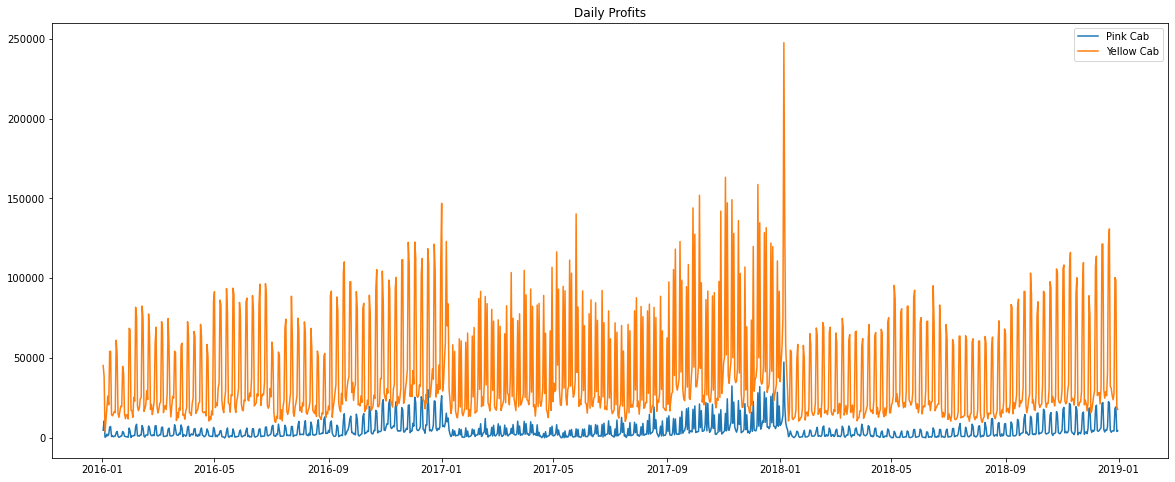

In [19]:
'''plot profits for entire data'''
c1_dates = pd.date_range(start = min(c1['Date of Travel']),end = max(c1['Date of Travel']))
c2_dates = pd.date_range(start = min(c2['Date of Travel']),end = max(c2['Date of Travel']))

c1_day = c1['Profit'].groupby([c1['Date of Travel'].dt.year, c1['Date of Travel'].dt.month, c1['Date of Travel'].dt.day]).agg({'sum'})
c2_day = c2['Profit'].groupby([c2['Date of Travel'].dt.year, c2['Date of Travel'].dt.month, c2['Date of Travel'].dt.day]).agg({'sum'})

plt.figure(figsize=(20,8))
sns.lineplot(x=c1_dates, y=[c for d in c1_day.values for c in d], label = 'Pink Cab', ci=None)
sns.lineplot(x=c2_dates, y=[c for d in c2_day.values for c in d], label = 'Yellow Cab', ci=None)
# sns.lineplot(x=c1_dates.values, y=c1_day.values, label = 'Pink Cab', ci=None)
# sns.lineplot(x=c2_dates.values, y=c2_day.values, label = 'Yellow Cab', ci=None)
plt.title('Daily Profits')
# plt.legends()
plt.show()

It can be seen from the above plot that profits are consistently higher for the Yellow Cab company. This information will be crucial in making the final decision on which company to invest in. 

Now that we have plotted daily sales data, we can look at monthly data to see if there are any trends. 

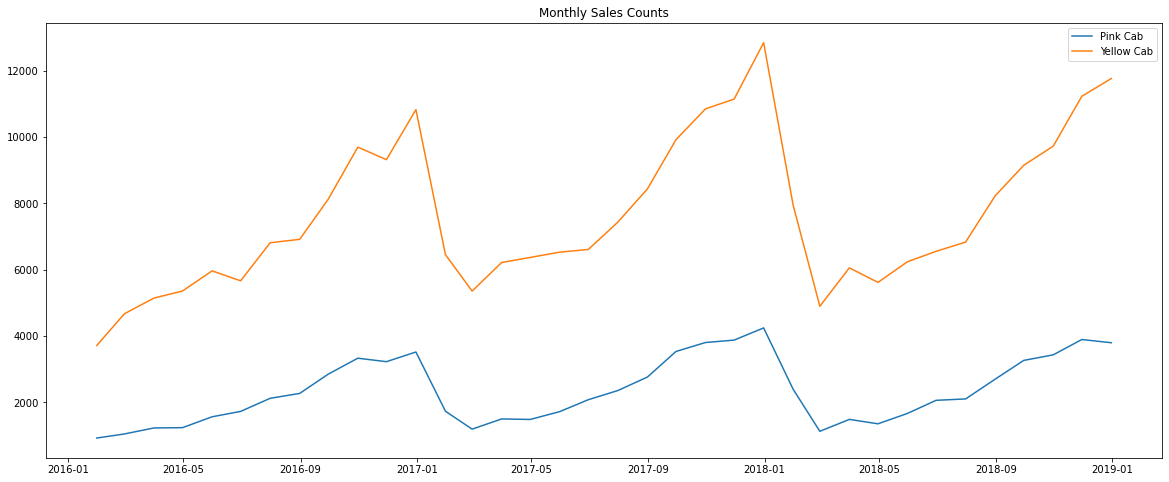

In [20]:
'''monthly counts'''

## plot number of sales per month for each company
c1_dates = pd.date_range(start = min(c1['Date of Travel']),end = max(c1['Date of Travel']), freq='m')
c2_dates = pd.date_range(start = min(c2['Date of Travel']),end = max(c2['Date of Travel']), freq='m')

c1_mon = c1['Profit'].groupby([c1['Date of Travel'].dt.year, c1['Date of Travel'].dt.month]).agg({'count'})
c2_mon = c2['Profit'].groupby([c2['Date of Travel'].dt.year, c2['Date of Travel'].dt.month]).agg({'count'})

plt.figure(figsize=(20,8))
sns.lineplot(x = c1_dates,y=[c for d in c1_mon.values for c in d], label = 'Pink Cab')
sns.lineplot(x = c2_dates,y=[c for d in c2_mon.values for c in d], label = 'Yellow Cab')
plt.title('Monthly Sales Counts')
# sns.lineplot(x = range(len(c1_mon)),y=[c for d in c1_mon.values for c in d],label = 'Pink Cab')
# sns.lineplot(x = range(len(c2_mon)),y=[c for d in c2_mon.values for c in d],label = 'Yellow Cab')
plt.show()


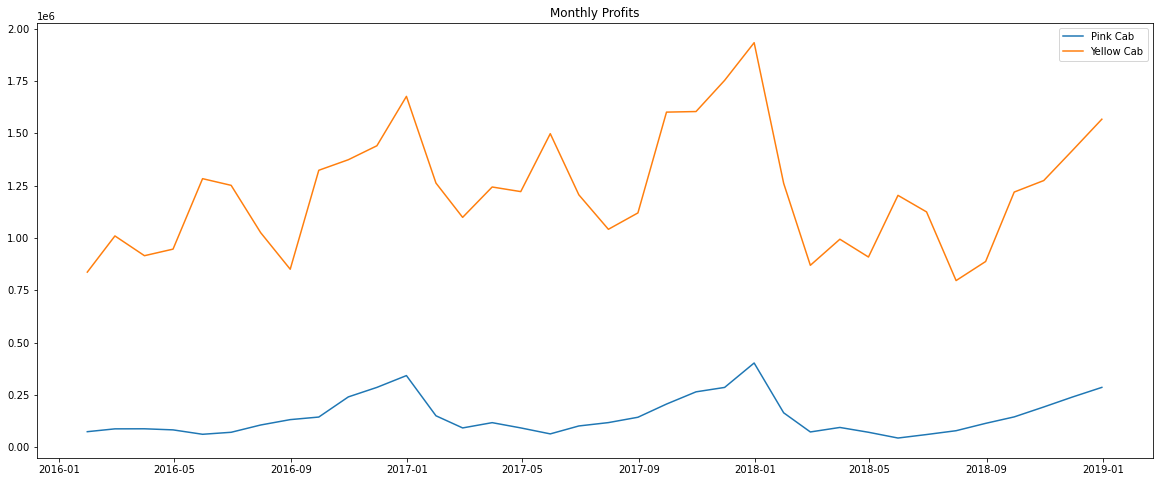

In [21]:
'''monthly profits'''

## plot profit per month for each company
c1_dates = pd.date_range(start = min(c1['Date of Travel']),end = max(c1['Date of Travel']), freq='m')
c2_dates = pd.date_range(start = min(c2['Date of Travel']),end = max(c2['Date of Travel']), freq='m')

c1_pro = c1['Profit'].groupby([c1['Date of Travel'].dt.year, c1['Date of Travel'].dt.month]).agg('sum')
c2_pro = c2['Profit'].groupby([c2['Date of Travel'].dt.year, c2['Date of Travel'].dt.month]).agg('sum')

plt.figure(figsize=(20,8))

sns.lineplot(x = c1_dates,y=[c for c in c1_pro.values], label = 'Pink Cab')
sns.lineplot(x = c2_dates,y=[c for c in c2_pro.values], label = 'Yellow Cab')
plt.title('Monthly Profits')

plt.show()

It can be seen from the 2 plots above that, not only does the Yellow Cab company have more customers, but their profits are also consistently higher over the 36 month period.

Plotting sales counts and profit by month gives a clearer view of the situation, compared to plotting daily sales.

At a glance it seems they might both be affected by seasonality. This is not unexpected as both are cab companies operating in the same market. It can be seen that the sales peak around the end of each year. This might be explained by the increase in travel during the holiday season. 

It is not so easy to spot this trend when looking at the plots of daily sales. 


## Seasonality/ Trends

We have hypothesised that the number of sales and profits for each company peak around the end of each year. We can confirm this by checking for seasonality by using the *statsmodels* package. Seasonal decompose gives us the seasonality and the trend as well. 

First, we create new dataframes using the monthly sales counts and profits data. We also create a date range for the purpose of plotting.

In [22]:
'''new dataframes from monthly data'''

start_1, end_1 = min(c1['Date of Travel']), max(c1['Date of Travel'])
dates_1 = pd.date_range(start_1, end_1, freq="M")
d1 = pd.DataFrame([dates_1, c1_mon.values, c1_pro.values]).transpose()
d1 = d1.set_index(d1[0]).asfreq('m')
d1.columns = ['Date', 'Count', 'Profit']

start_2, end_2 = min(c2['Date of Travel']), max(c2['Date of Travel'])
dates_2 = pd.date_range(start_2, end_2, freq="M")
d2 = pd.DataFrame([dates_2, c2_mon.values, c2_pro.values]).transpose()
d2 = d2.set_index(d2[0]).asfreq('m')
d2.columns = ['Date', 'Count', 'Profit']

d2.head()

,Date,Count,Profit
0,,,
2016-01-31,2016-01-31,[3719],836308.1108
2016-02-29,2016-02-29,[4674],1009169.1724
2016-03-31,2016-03-31,[5146],914764.7844
2016-04-30,2016-04-30,[5360],946136.4216
2016-05-31,2016-05-31,[5967],1282773.4132


In [23]:
'''use statsmodel package to decompose series'''

from statsmodels.tsa.seasonal import seasonal_decompose

decomp_1_count = seasonal_decompose(d1[['Count']], model="additive")    ## decompose the monthly sales counts
decomp_2_count = seasonal_decompose(d2[['Count']], model="additive")

decomp_1_pro = seasonal_decompose(d1[['Profit']], model="additive")     ## decompose monthly profits
decomp_2_pro = seasonal_decompose(d2[['Profit']], model="additive")

## write short function so plots can be side by side 

def plotseasonal(res, axes ):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

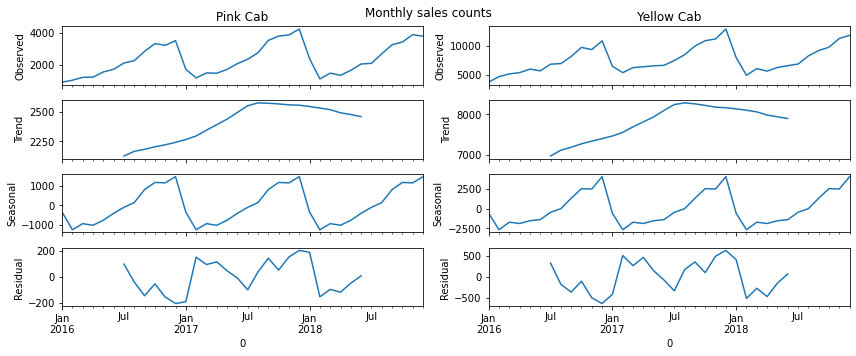

In [24]:
'''plot decomposition of monthly sales counts'''

fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(12,5))

plotseasonal(decomp_1_count, axes[:,0])
axes[0,0].set_title('Pink Cab')
plotseasonal(decomp_2_count, axes[:,1])
axes[0,1].set_title('Yellow Cab')

plt.tight_layout()
plt.suptitle('Monthly sales counts')
plt.show()

The monthly sales count shows very clear seasonality. We can see that, for both companies, the peak occurs in the 12th month, December, of each year. This coincides with the holiday season in America. 

There is also a trend that is present in the decomposition of both companies. The sales count keeps rising till around August 2017, after which it declines for both companies. The cause of this trend calls for further investigation. 

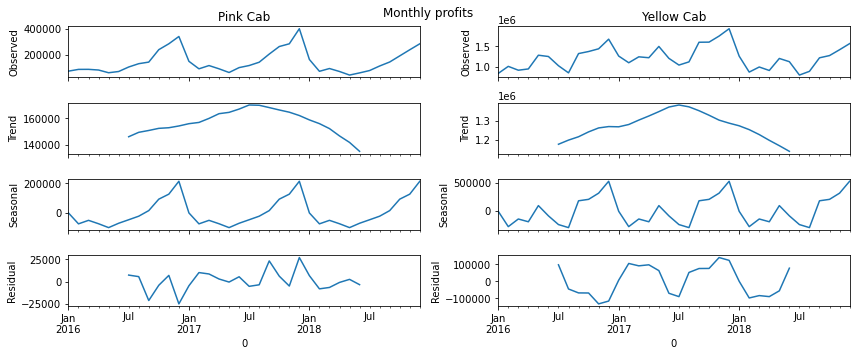

In [25]:
'''plot decomposition of monthly profits'''

fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(12,5))

plotseasonal(decomp_1_pro, axes[:,0])
axes[0,0].set_title('Pink Cab')
plotseasonal(decomp_2_pro, axes[:,1])
axes[0,1].set_title('Yellow Cab')

plt.tight_layout()
plt.suptitle('Monthly profits')
plt.show()

Here we see the same seasonal decompostion for monthly profits. We see the same trend for both companies; the profits start to decline around August 2017. 

It is interesting to see the difference in seasonality between the two companies. Although the seasonality was about the same when we looked at the plots for monthly counts, when we plot the decomposition of monthly profits, we see that there is a difference between the two companies. 

The Yellow cab company profits peak in December of each year, same as the monthly counts. But, we also see a smaller peak in May of each year. This might coincide with the spring holiday period. 

However, it is surprising that we don't see the same seasonality in the profits for the Pink Cab company. There is a small peak in March of each year, but it is almost insignificant. 

It is even more surprising that where we see peaks for the Yellow Cab company, in May, we also see a minimum for the Pink Cab company. Does this mean that customers prefer the Yellow company during the summer ? This calls for further investigation as well. 

# Customer Profile

## Income

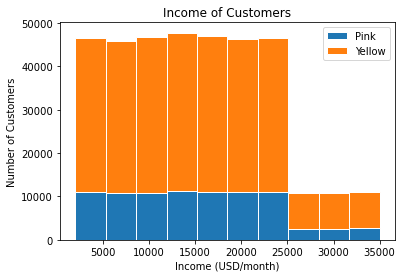

In [26]:
n_bins=10
x = [c1['Income (USD/Month)'],c2['Income (USD/Month)']]
comp = ['Pink', 'Yellow']
plt.hist(x, n_bins, histtype='bar', stacked=True, label=comp, edgecolor='white')
plt.legend(loc="upper right")
plt.xlabel("Income (USD/month)")
plt.ylabel("Number of Customers")
plt.title('Income of Customers')
plt.show()

The histogram above compares the incomes of customers for the two companies. For lower income brackets (0 < income < 25000), the Yellow Cab company has many times more customers than the Pink Cab company (about 4 times as many). We can see that this factor drops for higher income brackets (income > 25000). 

We know from counting the number of unique customers that there are many repeat customers. We can eliminate these entries from the data so it is easier to analyse the customer base.

In [27]:
## group by customer id, only consider if income is unique, i.e; do not count same customer with same income more than once 

c1_inc = c1.groupby('Customer ID')['Income (USD/Month)'].unique()
c2_inc = c2.groupby('Customer ID')['Income (USD/Month)'].unique()

# c1_inc = c1_inc.reset_index()
len(c1_inc), len(c2_inc)

(32330, 39896)

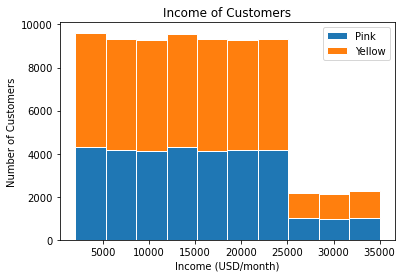

In [28]:
n_bins=10
# x = [[c for c in c1_inc],[c for c in c2_inc]]
# x = [[c1_inc.values],[c2_inc.values]]
x = np.asarray([[c for c in c1_inc],[c for c in c2_inc]], dtype=object)

comp = ['Pink', 'Yellow']
plt.hist(x, n_bins, histtype='bar', stacked=True, label=comp, edgecolor='white')
plt.legend(loc="upper right")
plt.xlabel("Income (USD/month)")
plt.ylabel("Number of Customers")
plt.title('Income of Customers')
plt.show()

Now that the repeat customers have been removed, we can have a clearer picture of the customer profiles of both companies. Now, the difference in number of customers is not as high (compared to the previous histogram). The factor seems to have dropped from 4 to 2 (approx). We can also see that the factor is approximately equal for lower (<25000) and higher (>25000) income brackets. 

It can be said that the Yellow Cab company has approximately twice as many customers as the Pink Cab company, and this is the case for every income bracket. 

## Age

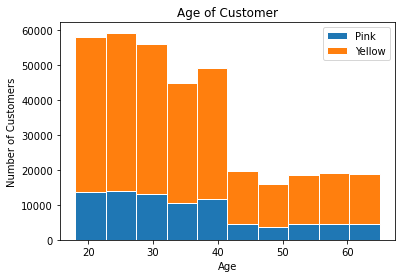

In [29]:
n_bins=10
x = [c1['Age'],c2['Age']]
comp = ['Pink', 'Yellow']
fig, ax = plt.subplots()
counts, edges, bars = ax.hist(x, n_bins, histtype='bar', stacked=True, label=comp, edgecolor='white')
plt.legend(loc="upper right")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title('Age of Customer')
# for b in bars:
#     ax.bar_label(b)
plt.show()

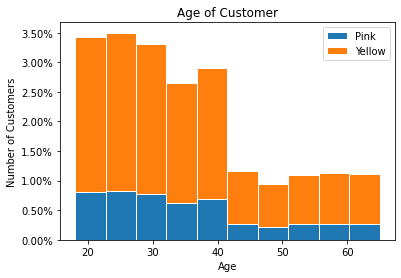

In [30]:
## show customer percentages by age
from matplotlib.ticker import PercentFormatter

n_bins=10
x = [c1['Age'],c2['Age']]
comp = ['Pink', 'Yellow']
fig, ax = plt.subplots()
counts, edges, bars = ax.hist(x, n_bins, histtype='bar', stacked=True, label=comp, edgecolor='white', density=True)
plt.legend(loc="upper right")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title('Age of Customer')
# for b in bars:
#     ax.bar_label(b)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

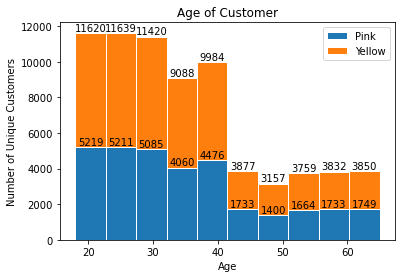

In [31]:
## group by customer id, only consider if age is unique, i.e; do not count same customer with same age more than once 

c1_age = c1.groupby('Customer ID')['Age'].unique()
c2_age = c2.groupby('Customer ID')['Age'].unique()

n_bins=10
x = np.asarray([[c for c in c1_age],[c for c in c2_age]], dtype=object)

comp = ['Pink', 'Yellow']
fig, ax = plt.subplots()
counts, edges, bars = ax.hist(x, n_bins, histtype='bar', stacked=True, label=comp, edgecolor='white')
plt.legend(loc="upper right")
plt.xlabel("Age")
plt.ylabel("Number of Unique Customers")
plt.title('Age of Customer')
for b in bars:
    ax.bar_label(b)

plt.show()

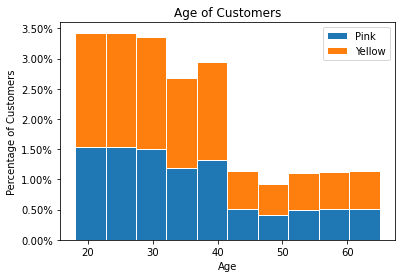

In [32]:
## group by customer id, only consider if age is unique, i.e; do not count same customer with same age more than once 
from matplotlib.ticker import PercentFormatter

c1_age = c1.groupby('Customer ID')['Age'].unique()
c2_age = c2.groupby('Customer ID')['Age'].unique()

n_bins=10
# x = [[c for c in c1_inc],[c for c in c2_inc]]
# x = [[c1_inc.values],[c2_inc.values]]
x = np.asarray([[c for c in c1_age],[c for c in c2_age]], dtype=object)

comp = ['Pink', 'Yellow']
fig, ax = plt.subplots()
counts, edges, bars = ax.hist(x, n_bins, histtype='bar', stacked=True, density=True, label=comp, edgecolor='white')
plt.legend(loc="upper right")
plt.xlabel("Age")
plt.ylabel("Percentage of Customers")
plt.title('Age of Customers')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
# for b in bars:
#     # c = round(b,3)
#     ax.bar_label(b)
plt.show()

# Distance

In [33]:
len(c2)

274681

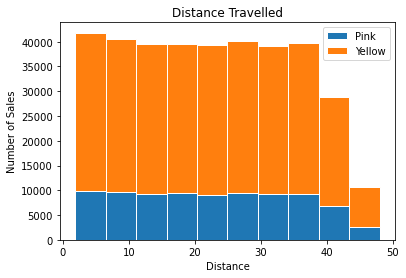

In [34]:
n_bins=10
x = [c1['KM Travelled'],c2['KM Travelled']]
comp = ['Pink', 'Yellow']
fig, ax = plt.subplots()
counts, edges, bars = ax.hist(x, n_bins, histtype='bar', stacked=True, label=comp, edgecolor='white')
plt.legend(loc="upper right")
plt.xlabel("Distance")
plt.ylabel("Number of Sales")
plt.title('Distance Travelled')
# for b in bars:
#     ax.bar_label(b)
plt.show()

# City

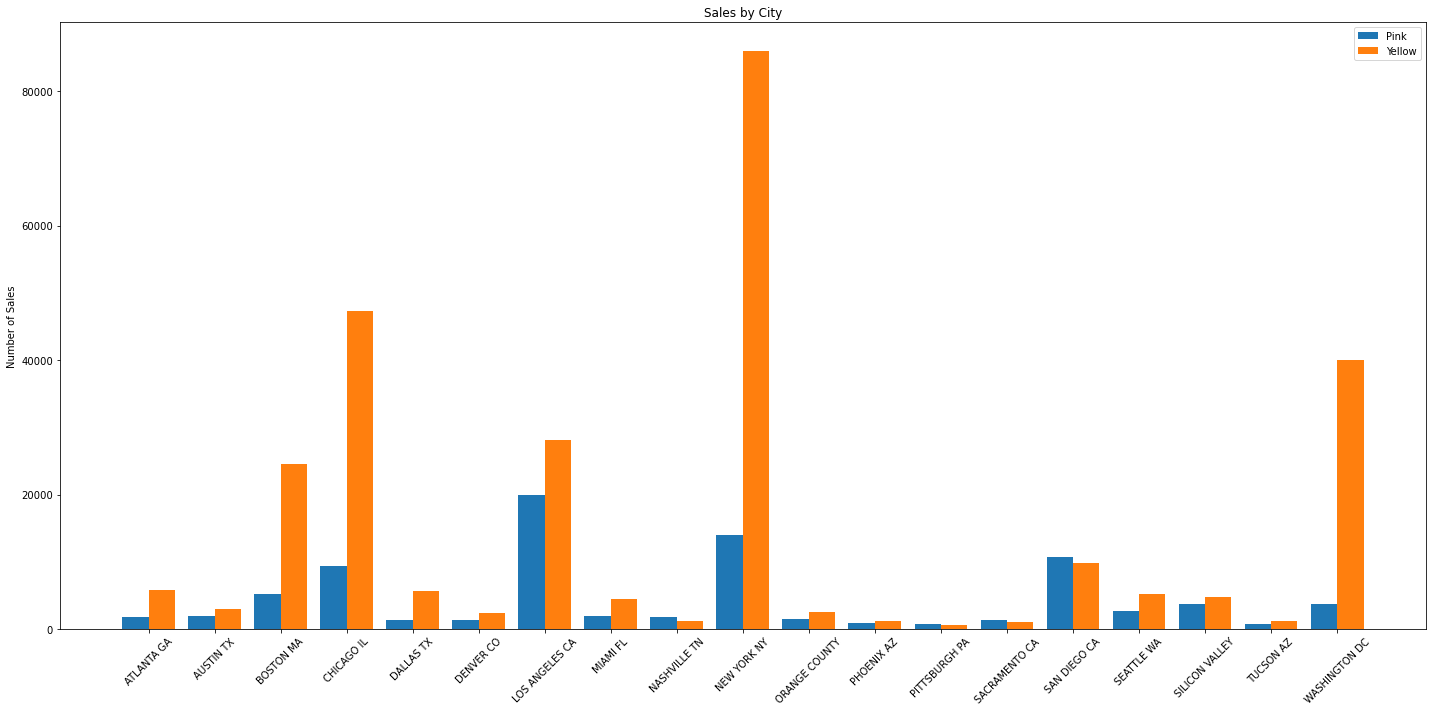

In [35]:
'''plot sales counts for each city'''

plt.rcParams["figure.figsize"] = (20,10)
c1_city = c1['Profit'].groupby(c1['City']).agg({'count'})
c2_city = c2['Profit'].groupby(c2['City']).agg({'count'})
labels = c1_city.index.values

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x-width/2, c1_city['count'].values, width, label='Pink')
rects2 = ax.bar(x+width/2, c2_city['count'].values, width, label='Yellow')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Sales')
ax.set_title('Sales by City')
ax.set_xticks(x)
plt.xticks(rotation=45)
ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [36]:
c1_city

,count
City,
ATLANTA GA,1762
AUSTIN TX,1868
BOSTON MA,5186
CHICAGO IL,9361
DALLAS TX,1380
DENVER CO,1394
LOS ANGELES CA,19865
MIAMI FL,2002
NASHVILLE TN,1841


In [37]:
cc = [c1_city.index[i] for i in range(len(c1_city)) if c1_city.values[i]>c2_city.values[i]]
cc

['NASHVILLE TN', 'PITTSBURGH PA', 'SACRAMENTO CA', 'SAN DIEGO CA']

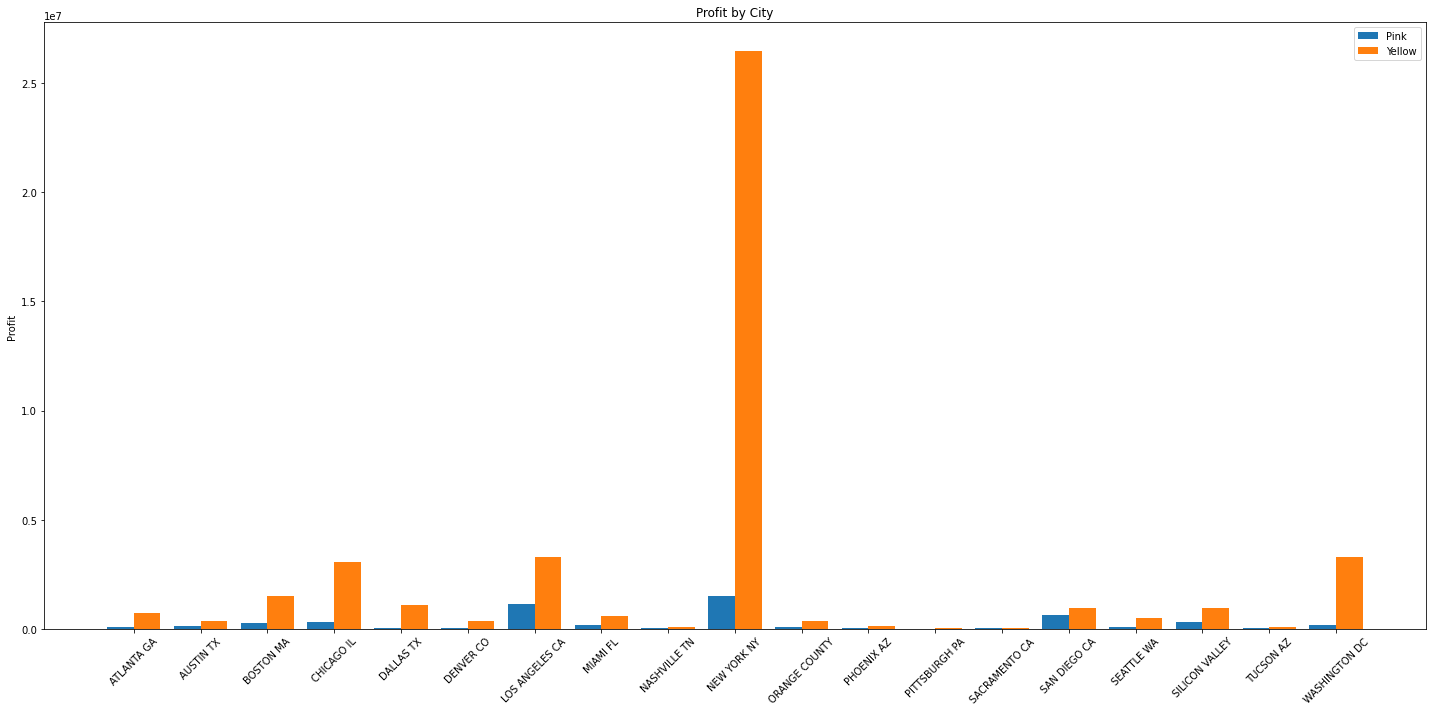

In [38]:
'''plot profits for each city'''

plt.rcParams["figure.figsize"] = (20,10)
c1_city = c1['Profit'].groupby(c1['City']).agg({'sum'})
c2_city = c2['Profit'].groupby(c2['City']).agg({'sum'})
labels = c1_city.index.values

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x-width/2, c1_city['sum'].values, width, label='Pink')
rects2 = ax.bar(x+width/2, c2_city['sum'].values, width, label='Yellow')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Profit')
ax.set_title('Profit by City')
ax.set_xticks(x)
plt.xticks(rotation=45)
ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [39]:
cc = [c1_city.index[i] for i in range(len(c1_city)) if c1_city.values[i]>c2_city.values[i]]
cc

[]

In [40]:
c1_city

,sum
City,
ATLANTA GA,96050.076
AUSTIN TX,147445.290
BOSTON MA,262001.698
CHICAGO IL,318722.488
DALLAS TX,24730.112
DENVER CO,40584.939
LOS ANGELES CA,1125732.065
MIAMI FL,162301.191
NASHVILLE TN,64284.534


EDA Hypotheses:

1. Yellow Cab has more customers
2. Yellow Cab has more sales
3. Yellow Cab has higher profits
4. Yellow Cab has more repeat customers
5. Yellow Cab has more customers from every income bracket
6. There is seasonality in the data

# Forecasting

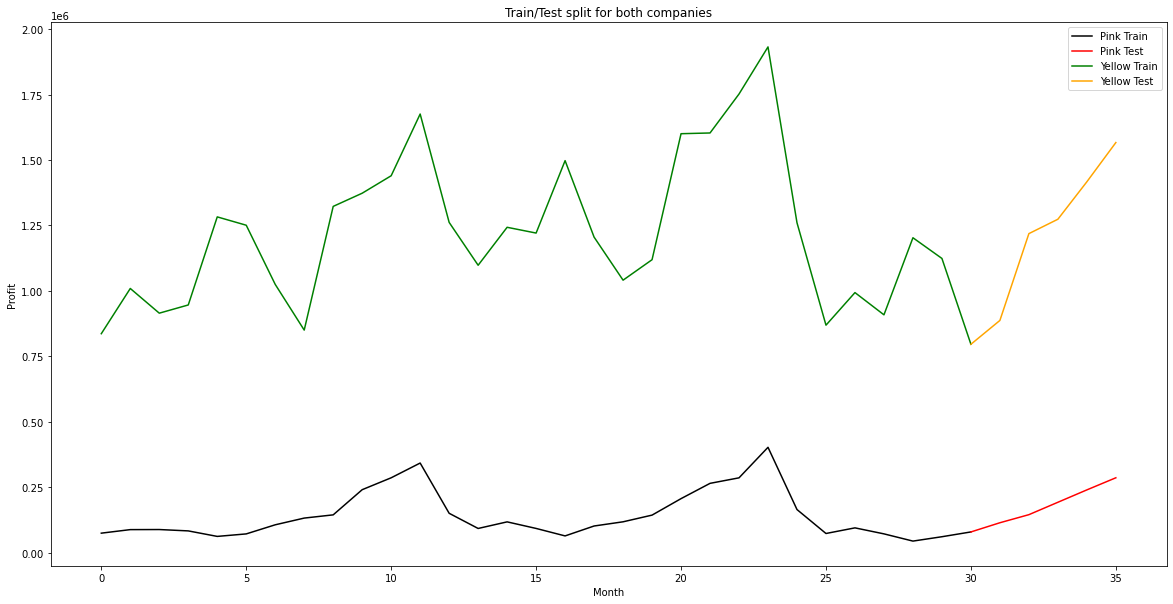

In [41]:
'''split data into train and test sets'''

c1_train = c1_pro[0:len(c1_pro)-5]
c1_test = c1_pro[len(c1_pro)-6:]

c2_train = c2_pro[0:len(c2_pro)-5]
c2_test = c2_pro[len(c2_pro)-6:]

plt.plot([c for c in range(len(c1_pro)-5)],[c for c in c1_train], color = "black", label = 'Pink Train')
plt.plot([c for c in range(len(c1_pro)-6,len(c1_pro))],[c for c in c1_test], color = "red", label = 'Pink Test')

plt.plot([c for c in range(len(c2_pro)-5)],[c for c in c2_train], color = "green", label = 'Yellow Train')
plt.plot([c for c in range(len(c2_pro)-6,len(c2_pro))],[c for c in c2_test], color = "orange", label = 'Yellow Test')

plt.ylabel('Profit')
plt.xlabel('Month')
# plt.xticks(rotation=45)
plt.title("Train/Test split for both companies")
plt.legend()
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36921D+00    |proj g|=  2.30842D+00

At iterate    5    f=  6.26172D+00    |proj g|=  1.33265D-01


 This problem is unconstrained.



At iterate   10    f=  6.24338D+00    |proj g|=  2.35479D-02

At iterate   15    f=  6.23875D+00    |proj g|=  2.82058D-02

At iterate   20    f=  6.23740D+00    |proj g|=  2.92408D-03

At iterate   25    f=  6.23739D+00    |proj g|=  1.07463D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     25     29      1     0     0   1.075D-04   6.237D+00
  F =   6.2373932299629011     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


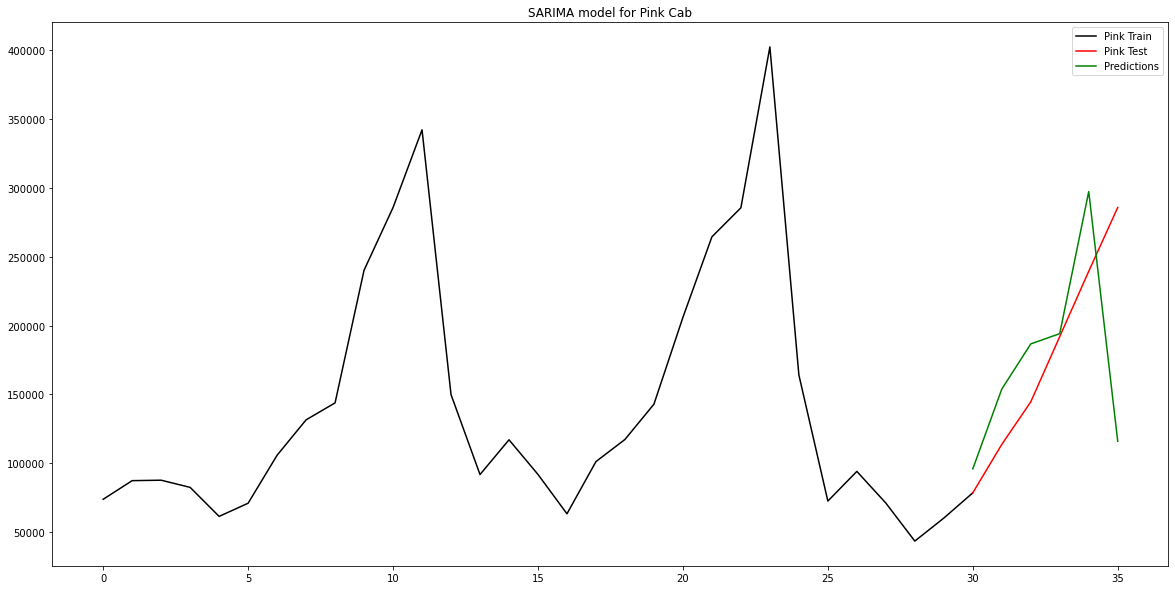

In [71]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

y1 = c1_train
ARMAmodel = SARIMAX(y1, order = (5, 2, 1), seasonal_order=(2,1,0,12))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(c1_test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = c1_test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot([c for c in range(len(c1_pro)-5)], [c for c in c1_train], color = "black", label = 'Pink Train')
plt.plot([c for c in range(len(c1_pro)-6,len(c1_pro))], [c for c in c1_test], color = "red", label = 'Pink Test')

plt.plot([c for c in range(len(c1_pro)-6,len(c1_pro))], [y for y in y_pred_out], color='green', label = 'Predictions')
plt.legend()
plt.title('SARIMA model for Pink Cab')

plt.show()

In [43]:

# ## Building the SARIMA models

# create a function to generate combinations of input list of no.

def pdq_grid(p, d, q):
    pdq = []
    for i in p:
        for j in d:
            for k in q:
                pdq.append([i, j, k])
    return pdq

def PDQm_grid(P, D, Q, m):
    PDQm = []
    for i in P:
        for j in D:
            for k in Q:
                for l in m:
                    PDQm.append([i, j, k, l])
    return PDQm
    

# possible values of the parameters
p = [5]
d = [2]
q = [1]
P = range(5)
D = [1]
Q = range(5)
m = [12]

# create all combinations of possible values
pdq = pdq_grid(p, d, q)
PDQm = PDQm_grid(P, D, Q, m)

In [44]:
# create a function for semi-grid-searching SARIMA
def SARIMA_grid(endog, order, seasonal_order):

    # create an empty list to store values
    model_info = []
    
    # filter away errors & warnings due to failture to converge, LU decomposition errors, etc
    import warnings
    warnings.simplefilter("ignore")
    
    #fit the model
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    from statsmodels.tools.eval_measures import rmse
    for i in order:
        for j in seasonal_order:
            try:
                model = SARIMAX(endog=endog, order=i, seasonal_order=j)
                result = model.fit()
                predict = result.predict()
            
                # calculate evaluation metrics: MAPE, RMSE, AIC & BIC
                MAPE = (abs((endog-predict)[1:])/(endog[1:])).mean()
                RMSE = rmse(endog[1:], predict[1:])
                AIC = result.aic
                BIC = result.bic
            
                # create a list of order, seasonal order & evaluation metrics
                info = [i, j, MAPE, RMSE, AIC, BIC]
                model_info.append(info)
                
            except:
                continue
            
    # create a dataframe to store info of all models
    columns = ["order", "seasonal_order", "MAPE", "RMSE", "AIC", "BIC"]
    model_info = pd.DataFrame(data=model_info, columns=columns)
    return model_info


In [45]:
import time
start = time.time()

model_info = SARIMA_grid(endog=c1_train, order=pdq, seasonal_order=PDQm);

end = time.time()
print(f'time required: {end - start}')

# save the results
model_info.to_csv(path_or_buf='sarima_semi_model.csv');

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36921D+00    |proj g|=  2.30842D+00

At iterate    5    f=  6.31555D+00    |proj g|=  1.65630D-01

At iterate   10    f=  6.29549D+00    |proj g|=  2.81989D-02

At iterate   15    f=  6.28794D+00    |proj g|=  2.05235D-02

At iterate   20    f=  6.28780D+00    |proj g|=  2.29003D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21     22      1     0     0   3.906D-05   6.288D+00
  F =   6.2878013380939670     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36921D+00    |proj g|=  2.30842D+00

At iterate    5    f=  6.25734D+00    |proj g|=  1.24071D-01

At iterate   10    f=  6.24365D+00    |proj g|=  2.26459D-02

At iterate   15    f=  6.23798D+00    |proj g|=  1.52776D-02

At iterate   20    f=  6.23779D+00    |proj g|=  4.56033D-04

At iterate   25    f=  6.23779D+00    |proj g|=  3.47268D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     26     29      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  6.25646D+00    |proj g|=  1.19311D-01

At iterate   10    f=  6.24359D+00    |proj g|=  2.31838D-02

At iterate   15    f=  6.23801D+00    |proj g|=  3.09273D-02

At iterate   20    f=  6.23764D+00    |proj g|=  3.10266D-03

At iterate   25    f=  6.23763D+00    |proj g|=  1.01894D-03

At iterate   30    f=  6.23762D+00    |proj g|=  7.72124D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     30     34      1     0     0   7.721D-05   6.238D+00
  F =   6.2376245875775602     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  6.25619D+00    |proj g|=  1.19255D-01

At iterate   10    f=  6.24332D+00    |proj g|=  2.27082D-02

At iterate   15    f=  6.23809D+00    |proj g|=  2.88923D-02

At iterate   20    f=  6.23750D+00    |proj g|=  5.43448D-03

At iterate   25    f=  6.23742D+00    |proj g|=  1.45863D-03

At iterate   30    f=  6.23742D+00    |proj g|=  4.94820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     30     33      1     0     0   4.948D-05   6.237D+00
  F =   6.2374155823768822     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  6.27347D+00    |proj g|=  1.43792D-01

At iterate   10    f=  6.25776D+00    |proj g|=  3.16484D-02

At iterate   15    f=  6.25111D+00    |proj g|=  1.69154D-02

At iterate   20    f=  6.25105D+00    |proj g|=  1.90558D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     21     23      1     0     0   2.677D-05   6.251D+00
  F =   6.2510515363225538     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  6.26269D+00    |proj g|=  4.49203D-02

At iterate   10    f=  6.25468D+00    |proj g|=  3.64371D-02

At iterate   15    f=  6.24806D+00    |proj g|=  1.09477D-02

At iterate   20    f=  6.24783D+00    |proj g|=  1.07793D-02

At iterate   25    f=  6.24608D+00    |proj g|=  3.87969D-02

At iterate   30    f=  6.24447D+00    |proj g|=  5.20716D-03

At iterate   35    f=  6.24420D+00    |proj g|=  3.42263D-03

At iterate   40    f=  6.24420D+00    |proj g|=  5.44314D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     40     46      1     0     0   5.443D-05   6.244D+00
  F =   6.24419782955

 This problem is unconstrained.



At iterate    5    f=  6.25262D+00    |proj g|=  7.07326D-02

At iterate   10    f=  6.24314D+00    |proj g|=  1.92060D-02

At iterate   15    f=  6.23936D+00    |proj g|=  2.29362D-02

At iterate   20    f=  6.23771D+00    |proj g|=  7.70183D-04

At iterate   25    f=  6.23770D+00    |proj g|=  9.07379D-04

At iterate   30    f=  6.23768D+00    |proj g|=  6.27199D-03

At iterate   35    f=  6.23767D+00    |proj g|=  3.15853D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     37     43      1     0     0   1.807D-04   6.238D+00
  F =   6.2376708190209618     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  6.25250D+00    |proj g|=  7.05981D-02

At iterate   10    f=  6.24304D+00    |proj g|=  1.96949D-02

At iterate   15    f=  6.23778D+00    |proj g|=  2.90552D-02

At iterate   20    f=  6.23765D+00    |proj g|=  2.01291D-03

At iterate   25    f=  6.23763D+00    |proj g|=  4.67996D-04

At iterate   30    f=  6.23763D+00    |proj g|=  4.32451D-04

At iterate   35    f=  6.23763D+00    |proj g|=  8.78761D-04

At iterate   40    f=  6.23757D+00    |proj g|=  3.23131D-03

At iterate   45    f=  6.23754D+00    |proj g|=  2.02033D-03

At iterate   50    f=  6.23753D+00    |proj g|=  8.79750D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  6.25237D+00    |proj g|=  7.10243D-02

At iterate   10    f=  6.24296D+00    |proj g|=  1.93586D-02

At iterate   15    f=  6.23786D+00    |proj g|=  2.04799D-02

At iterate   20    f=  6.23744D+00    |proj g|=  3.46249D-03

At iterate   25    f=  6.23741D+00    |proj g|=  5.20466D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     28     31      1     0     0   8.507D-05   6.237D+00
  F =   6.2374124557689372     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

 This problem is unconstrained.



At iterate   10    f=  6.24338D+00    |proj g|=  2.35479D-02

At iterate   15    f=  6.23875D+00    |proj g|=  2.82058D-02

At iterate   20    f=  6.23740D+00    |proj g|=  2.92408D-03

At iterate   25    f=  6.23739D+00    |proj g|=  1.07463D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     25     29      1     0     0   1.075D-04   6.237D+00
  F =   6.2373932299629011     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36921D+00    |proj g|=  2.30842D+00

At iterate    5    f=  6.25362D+00    |proj g|=  8.44080D-02

At iterate   10    f=  6.24265D+00    |proj g|=  2.27526D-02

At iterate   15    f=  6.23859D+00    |proj g|=  4.01214D-02

At iterate   20    f=  6.23741D+00    |proj g|=  3.54455D-03

At iterate   25    f=  6.23739D+00    |proj g|=  1.47624D-04

At iterate   30    f=  6.23739D+00    |proj g|=  4.47613D-04

At iterate   35    f=  6.23739D+00    |proj g|=  4.44611D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     39     60      1     0     0   1.199D-04   6.237D+00
  F =   6.2373928175041060     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36921D+00    |proj g|=  2.30842D+00

At iterate    5    f=  6.24857D+00    |proj g|=  4.60202D-02

At iterate   10    f=  6.24267D+00    |proj g|=  3.79033D-02

At iterate   15    f=  6.23748D+00    |proj g|=  2.92466D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  6.24854D+00    |proj g|=  4.55562D-02

At iterate   10    f=  6.24264D+00    |proj g|=  3.98516D-02

At iterate   15    f=  6.23748D+00    |proj g|=  2.46465D-03

At iterate   20    f=  6.23745D+00    |proj g|=  1.17235D-03

At iterate   25    f=  6.23744D+00    |proj g|=  6.88201D-04

At iterate   30    f=  6.23743D+00    |proj g|=  8.21891D-04

At iterate   35    f=  6.23740D+00    |proj g|=  4.60670D-03

At iterate   40    f=  6.23739D+00    |proj g|=  6.83435D-04

At iterate   45    f=  6.23739D+00    |proj g|=  1.47053D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     46     50   

 This problem is unconstrained.



At iterate    5    f=  6.24843D+00    |proj g|=  4.48779D-02

At iterate   10    f=  6.24253D+00    |proj g|=  4.32306D-02

At iterate   15    f=  6.23745D+00    |proj g|=  4.23219D-03

At iterate   20    f=  6.23741D+00    |proj g|=  1.04255D-03

At iterate   25    f=  6.23740D+00    |proj g|=  1.00601D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     29     32      1     0     0   6.924D-05   6.237D+00
  F =   6.2373990422794421     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36921D+00    |proj g|=  2.30842D+00

At iterate    5    f=  6.26171D+00    |proj g|=  1.33242D-01

At iterate   10    f=  6.24338D+00    |proj g|=  2.35449D-02

At iterate   15    f=  6.23870D+00    |proj g|=  2.88561D-02

At iterate   20    f=  6.23739D+00    |proj g|=  2.36093D-03

At iterate   25    f=  6.23739D+00    |proj g|=  7.99936D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     29     33      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36921D+00    |proj g|=  2.30842D+00

At iterate    5    f=  6.25362D+00    |proj g|=  8.44198D-02

At iterate   10    f=  6.24265D+00    |proj g|=  2.29265D-02

At iterate   15    f=  6.23860D+00    |proj g|=  3.84583D-02

At iterate   20    f=  6.23741D+00    |proj g|=  3.70779D-03

At iterate   25    f=  6.23739D+00    |proj g|=  1.84140D-03

At iterate   30    f=  6.23739D+00    |proj g|=  3.69403D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  6.24858D+00    |proj g|=  4.60059D-02

At iterate   10    f=  6.24264D+00    |proj g|=  3.81783D-02

At iterate   15    f=  6.23756D+00    |proj g|=  5.61134D-03

At iterate   20    f=  6.23745D+00    |proj g|=  3.99151D-03

At iterate   25    f=  6.23744D+00    |proj g|=  1.01049D-03

At iterate   30    f=  6.23742D+00    |proj g|=  4.62429D-03

At iterate   35    f=  6.23739D+00    |proj g|=  3.73211D-04

At iterate   40    f=  6.23739D+00    |proj g|=  4.38428D-04

At iterate   45    f=  6.23739D+00    |proj g|=  1.22625D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     46     49   

 This problem is unconstrained.



At iterate    5    f=  6.24855D+00    |proj g|=  4.55416D-02

At iterate   10    f=  6.24264D+00    |proj g|=  3.99554D-02

At iterate   15    f=  6.23753D+00    |proj g|=  4.54907D-03

At iterate   20    f=  6.23744D+00    |proj g|=  1.12035D-03

At iterate   25    f=  6.23744D+00    |proj g|=  1.12349D-03

At iterate   30    f=  6.23742D+00    |proj g|=  1.53675D-03

At iterate   35    f=  6.23740D+00    |proj g|=  1.13401D-03

At iterate   40    f=  6.23740D+00    |proj g|=  1.77838D-04

At iterate   45    f=  6.23740D+00    |proj g|=  8.93530D-04

At iterate   50    f=  6.23740D+00    |proj g|=  8.81154D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  6.24844D+00    |proj g|=  4.48600D-02

At iterate   10    f=  6.24252D+00    |proj g|=  4.34029D-02

At iterate   15    f=  6.23751D+00    |proj g|=  4.98894D-03

At iterate   20    f=  6.23740D+00    |proj g|=  9.41571D-04

At iterate   25    f=  6.23740D+00    |proj g|=  4.59551D-04

At iterate   30    f=  6.23740D+00    |proj g|=  3.53283D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     30     33      1     0     0   3.533D-04   6.237D+00
  F =   6.2373973320260427     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36921D+00    |proj g|=  2.30842D+00

At iterate    5    f=  6.26171D+00    |proj g|=  1.33241D-01

At iterate   10    f=  6.24338D+00    |proj g|=  2.35448D-02

At iterate   15    f=  6.23870D+00    |proj g|=  2.88641D-02

At iterate   20    f=  6.23739D+00    |proj g|=  2.34328D-03

At iterate   25    f=  6.23739D+00    |proj g|=  8.13786D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     29     33      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36921D+00    |proj g|=  2.30842D+00

At iterate    5    f=  6.25362D+00    |proj g|=  8.44196D-02

At iterate   10    f=  6.24265D+00    |proj g|=  2.29275D-02

At iterate   15    f=  6.23860D+00    |proj g|=  3.84262D-02

At iterate   20    f=  6.23741D+00    |proj g|=  3.71001D-03

At iterate   25    f=  6.23739D+00    |proj g|=  1.87775D-03

At iterate   30    f=  6.23739D+00    |proj g|=  1.34887D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36921D+00    |proj g|=  2.30842D+00

At iterate    5    f=  6.24856D+00    |proj g|=  4.58712D-02

At iterate   10    f=  6.24257D+00    |proj g|=  3.84471D-02

At iterate   15    f=  6.23770D+00    |proj g|=  7.65765D-03

At iterate   20    f=  6.23741D+00    |proj g|=  2.91635D-03

At iterate   25    f=  6.23739D+00    |proj g|=  3.21923D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     29     33      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  6.24853D+00    |proj g|=  4.54161D-02

At iterate   10    f=  6.24257D+00    |proj g|=  4.02328D-02

At iterate   15    f=  6.23767D+00    |proj g|=  7.81493D-03

At iterate   20    f=  6.23741D+00    |proj g|=  2.00188D-03

At iterate   25    f=  6.23739D+00    |proj g|=  1.20138D-03

At iterate   30    f=  6.23739D+00    |proj g|=  2.62586D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     33     36      1     0     0   1.137D-04   6.237D+00
  F =   6.2373928598474517     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  6.24842D+00    |proj g|=  4.47411D-02

At iterate   10    f=  6.24251D+00    |proj g|=  4.36737D-02

At iterate   15    f=  6.23750D+00    |proj g|=  4.89735D-03

At iterate   20    f=  6.23739D+00    |proj g|=  8.20595D-04

At iterate   25    f=  6.23739D+00    |proj g|=  1.93772D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     26     28      1     0     0   1.701D-04   6.237D+00
  F =   6.2373929582868097     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
time required: 42.0417160987854


In [76]:
least_RMSE

,order,seasonal_order,MAPE,RMSE,AIC,BIC
7,"[5, 2, 1]","[1, 1, 2, 12]",0.178032,308828.765079,465.991888,474.324021
20,"[5, 2, 1]","[4, 1, 0, 12]",0.183972,328066.871068,465.849360,475.014707
8,"[5, 2, 1]","[1, 1, 3, 12]",0.192829,328075.309722,469.329147,478.494494
16,"[5, 2, 1]","[3, 1, 1, 12]",0.184247,329364.760816,465.808272,474.973619
11,"[5, 2, 1]","[2, 1, 1, 12]",0.186462,337679.967701,463.865612,472.197746
10,"[5, 2, 1]","[2, 1, 0, 12]",0.187361,340449.480266,461.856795,469.355715
15,"[5, 2, 1]","[3, 1, 0, 12]",0.188890,351600.648696,463.685819,472.017952
22,"[5, 2, 1]","[4, 1, 2, 12]",0.190228,354187.804270,470.230995,481.062768
21,"[5, 2, 1]","[4, 1, 1, 12]",0.190115,355553.425915,467.702906,477.701467
0,"[5, 2, 1]","[0, 1, 0, 12]",0.209440,357720.244541,465.603444,471.435937


In [74]:
least_MAPE = model_info.nsmallest(10, "MAPE")
least_MAPE

# 10 least RMSE models
least_RMSE = model_info.nsmallest(10, "RMSE")
least_RMSE

# 10 least AIC models
least_AIC = model_info.nsmallest(10, "AIC")
least_AIC

# 10 least BIC models
least_BIC = model_info.nsmallest(10, "BIC")
least_BIC # the 1st 6 least BIC models are the same as the 1st 6 least AIC models

,order,seasonal_order,MAPE,RMSE,AIC,BIC
10,"[5, 2, 1]","[2, 1, 0, 12]",0.187361,340449.480266,461.856795,469.355715
0,"[5, 2, 1]","[0, 1, 0, 12]",0.209440,357720.244541,465.603444,471.435937
2,"[5, 2, 1]","[0, 1, 2, 12]",0.210067,382441.184695,464.512340,472.011260
15,"[5, 2, 1]","[3, 1, 0, 12]",0.188890,351600.648696,463.685819,472.017952
11,"[5, 2, 1]","[2, 1, 1, 12]",0.186462,337679.967701,463.865612,472.197746
3,"[5, 2, 1]","[0, 1, 3, 12]",0.211234,396202.586616,465.516759,473.848893
7,"[5, 2, 1]","[1, 1, 2, 12]",0.178032,308828.765079,465.991888,474.324021
1,"[5, 2, 1]","[0, 1, 1, 12]",0.205276,381470.081668,467.896891,474.562598
5,"[5, 2, 1]","[1, 1, 0, 12]",0.205256,380981.770876,468.032089,474.697796
16,"[5, 2, 1]","[3, 1, 1, 12]",0.184247,329364.760816,465.808272,474.973619


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36921D+00    |proj g|=  2.30842D+00


 This problem is unconstrained.



At iterate    5    f=  6.25362D+00    |proj g|=  8.44198D-02

At iterate   10    f=  6.24265D+00    |proj g|=  2.29265D-02

At iterate   15    f=  6.23860D+00    |proj g|=  3.84583D-02

At iterate   20    f=  6.23741D+00    |proj g|=  3.70779D-03

At iterate   25    f=  6.23739D+00    |proj g|=  1.84140D-03

At iterate   30    f=  6.23739D+00    |proj g|=  3.69403D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     30     34      1     0     0   3.694D-05   6.237D+00
  F =   6.2373926657788150     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


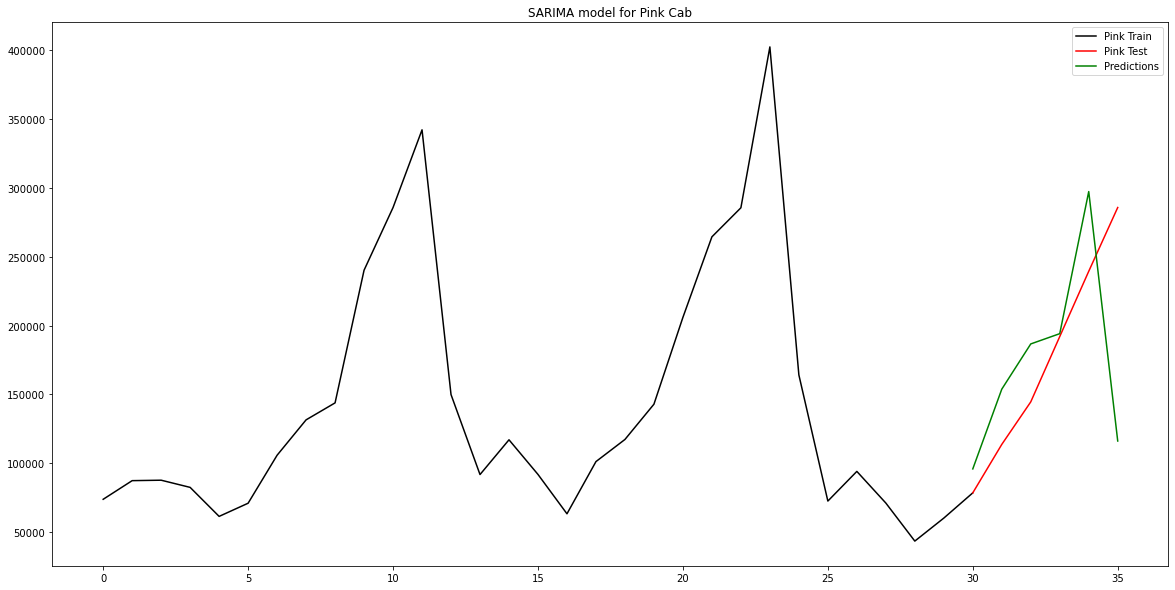

In [78]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

y1 = c1_train
ARMAmodel = SARIMAX(y1, order = (5, 2, 1), seasonal_order=(3,1,1,12))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(c1_test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = c1_test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot([c for c in range(len(c1_pro)-5)], [c for c in c1_train], color = "black", label = 'Pink Train')
plt.plot([c for c in range(len(c1_pro)-6,len(c1_pro))], [c for c in c1_test], color = "red", label = 'Pink Test')

plt.plot([c for c in range(len(c1_pro)-6,len(c1_pro))], [y for y in y_pred_out], color='green', label = 'Predictions')
plt.legend()
plt.title('SARIMA model for Pink Cab')

plt.show()

In [48]:
import time
start = time.time()

model_info = SARIMA_grid(endog=c2_train, order=pdq, seasonal_order=PDQm);

end = time.time()
print(f'time required: {end - start}')

# save the results
model_info.to_csv(path_or_buf='sarima_semi_model.csv');

least_MAPE = model_info.nsmallest(10, "MAPE")
least_MAPE

# 10 least RMSE models
least_RMSE = model_info.nsmallest(10, "RMSE")
least_RMSE

# 10 least AIC models
least_AIC = model_info.nsmallest(10, "AIC")
least_AIC

# 10 least BIC models
least_BIC = model_info.nsmallest(10, "BIC")
least_BIC # the 1st 6 least BIC models are the same as the 1st 6 least AIC models

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18703D+01    |proj g|=  1.34115D+01

At iterate    5    f=  8.64183D+00    |proj g|=  1.43190D+00

At iterate   10    f=  7.98200D+00    |proj g|=  6.33368D-01

At iterate   15    f=  7.30967D+00    |proj g|=  2.00031D-01

At iterate   20    f=  7.30316D+00    |proj g|=  9.62716D-03

At iterate   25    f=  7.30247D+00    |proj g|=  5.86177D-02

At iterate   30    f=  7.29008D+00    |proj g|=  3.27602D-02

At iterate   35    f=  7.28523D+00    |proj g|=  1.42483D-02

At iterate   40    f=  7.28410D+00    |proj g|=  1.76126D-02

At iterate   45    f=  7.28395D+00    |proj g|=  1.09363D-03

At iterate   50    f=  7.28393D+00    |proj g|=  9.77269D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.23801D+00    |proj g|=  1.34157D+00

At iterate   15    f=  7.37641D+00    |proj g|=  3.40480D-01

At iterate   20    f=  7.31386D+00    |proj g|=  2.05251D-01

At iterate   25    f=  7.28906D+00    |proj g|=  5.92711D-02

At iterate   30    f=  7.28866D+00    |proj g|=  6.21188D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     31     38      1     0     0   2.376D-05   7.289D+00
  F =   7.2886595344879925     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

 This problem is unconstrained.



At iterate    5    f=  8.80320D+00    |proj g|=  1.13781D+00

At iterate   10    f=  7.60868D+00    |proj g|=  6.22103D-01

At iterate   15    f=  7.26739D+00    |proj g|=  2.65859D-01

At iterate   20    f=  7.24408D+00    |proj g|=  4.10577D-02

At iterate   25    f=  7.22734D+00    |proj g|=  1.71257D-01

At iterate   30    f=  7.21414D+00    |proj g|=  5.48606D-02

At iterate   35    f=  7.20302D+00    |proj g|=  2.83966D-02

At iterate   40    f=  7.20186D+00    |proj g|=  3.13454D-03

At iterate   45    f=  7.20185D+00    |proj g|=  6.63761D-04

At iterate   50    f=  7.20181D+00    |proj g|=  1.42946D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.70749D+00    |proj g|=  1.10402D+00

At iterate   10    f=  7.53348D+00    |proj g|=  3.48898D-01

At iterate   15    f=  7.35280D+00    |proj g|=  1.03047D-01

At iterate   20    f=  7.34297D+00    |proj g|=  9.02342D-02

At iterate   25    f=  7.32398D+00    |proj g|=  1.49180D-02

At iterate   30    f=  7.28633D+00    |proj g|=  2.89070D-01

At iterate   35    f=  7.23172D+00    |proj g|=  1.13878D-01

At iterate   40    f=  7.21186D+00    |proj g|=  1.55644D-01

At iterate   45    f=  7.19176D+00    |proj g|=  1.09689D-01

At iterate   50    f=  7.18575D+00    |proj g|=  1.75609D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18703D+01    |proj g|=  1.34115D+01

At iterate    5    f=  8.70824D+00    |proj g|=  1.06422D+00

At iterate   10    f=  7.45746D+00    |proj g|=  3.41912D-01

At iterate   15    f=  7.32281D+00    |proj g|=  1.04182D-01

At iterate   20    f=  7.29234D+00    |proj g|=  4.77598D-02

At iterate   25    f=  7.29112D+00    |proj g|=  2.65113D-02

At iterate   30    f=  7.28494D+00    |proj g|=  5.77664D-02

At iterate   35    f=  7.27890D+00    |proj g|=  7.19503D-02

At iterate   40    f=  7.25161D+00    |proj g|=  2.40109D-01

At iterate   45    f=  7.22564D+00    |proj g|=  1.93830D-01

At iterate   50    f=  7.21015D+00    |proj g|=  2.26221D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16809D+01    |proj g|=  1.33754D+01

At iterate    5    f=  8.90862D+00    |proj g|=  1.20476D+00

At iterate   10    f=  8.22898D+00    |proj g|=  1.22467D+00

At iterate   15    f=  7.41189D+00    |proj g|=  5.75471D-01

At iterate   20    f=  7.33179D+00    |proj g|=  2.60483D-01

At iterate   25    f=  7.29406D+00    |proj g|=  1.47009D-01

At iterate   30    f=  7.29084D+00    |proj g|=  1.71527D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   15    f=  7.42202D+00    |proj g|=  2.98681D-01

At iterate   20    f=  7.38457D+00    |proj g|=  6.14570D-02

At iterate   25    f=  7.31366D+00    |proj g|=  1.93170D-01

At iterate   30    f=  7.28806D+00    |proj g|=  4.96105D-02

At iterate   35    f=  7.28625D+00    |proj g|=  3.43222D-02

At iterate   40    f=  7.27654D+00    |proj g|=  1.84153D-01

At iterate   45    f=  7.27233D+00    |proj g|=  4.35569D-02

At iterate   50    f=  7.26924D+00    |proj g|=  2.62585D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     58      1     0     0   2.626D-02   7.269D+00
  F =   7.26924355424

 This problem is unconstrained.



At iterate    5    f=  8.76437D+00    |proj g|=  7.52789D-01

At iterate   10    f=  7.62223D+00    |proj g|=  5.00439D-01

At iterate   15    f=  7.33363D+00    |proj g|=  1.75410D-01

At iterate   20    f=  7.29812D+00    |proj g|=  9.06282D-02

At iterate   25    f=  7.22362D+00    |proj g|=  1.51677D-01

At iterate   30    f=  7.21417D+00    |proj g|=  1.06770D-02

At iterate   35    f=  7.21327D+00    |proj g|=  4.60572D-03

At iterate   40    f=  7.21324D+00    |proj g|=  1.46680D-03

At iterate   45    f=  7.20896D+00    |proj g|=  1.33891D-01

At iterate   50    f=  7.19342D+00    |proj g|=  2.12790D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.27493D+00    |proj g|=  7.03164D-01

At iterate   10    f=  7.54028D+00    |proj g|=  6.30799D-01

At iterate   15    f=  7.33641D+00    |proj g|=  6.98760D-02

At iterate   20    f=  7.32637D+00    |proj g|=  3.47557D-02

At iterate   25    f=  7.30397D+00    |proj g|=  1.56757D-01

At iterate   30    f=  7.25426D+00    |proj g|=  9.02245D-02

At iterate   35    f=  7.22558D+00    |proj g|=  9.10775D-02

At iterate   40    f=  7.21599D+00    |proj g|=  6.43910D-03

At iterate   45    f=  7.21502D+00    |proj g|=  2.31819D-03

At iterate   50    f=  7.21499D+00    |proj g|=  1.40908D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.68678D+00    |proj g|=  7.00228D-01

At iterate   10    f=  7.49989D+00    |proj g|=  3.56952D-01

At iterate   15    f=  7.36343D+00    |proj g|=  7.96270D-02

At iterate   20    f=  7.32916D+00    |proj g|=  1.80334D-02

At iterate   25    f=  7.30355D+00    |proj g|=  1.42835D-01

At iterate   30    f=  7.23940D+00    |proj g|=  7.06038D-02

At iterate   35    f=  7.21426D+00    |proj g|=  2.28481D-02

At iterate   40    f=  7.20189D+00    |proj g|=  3.70968D-02

At iterate   45    f=  7.20035D+00    |proj g|=  8.49521D-03

At iterate   50    f=  7.19439D+00    |proj g|=  1.95502D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18703D+01    |proj g|=  1.34115D+01

At iterate    5    f=  8.81790D+00    |proj g|=  1.08926D+00

At iterate   10    f=  7.71083D+00    |proj g|=  6.04280D-01

At iterate   15    f=  7.51345D+00    |proj g|=  2.28709D-01

At iterate   20    f=  7.46096D+00    |proj g|=  4.56359D-02

At iterate   25    f=  7.36915D+00    |proj g|=  3.30039D-01

At iterate   30    f=  7.22224D+00    |proj g|=  4.52458D-01

At iterate   35    f=  7.18157D+00    |proj g|=  4.77518D-02

At iterate   40    f=  7.16795D+00    |proj g|=  5.52254D-02

At iterate   45    f=  7.16033D+00    |proj g|=  3.84971D-02

At iterate   50    f=  7.15898D+00    |proj g|=  6.81124D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  8.34115D+00    |proj g|=  1.20541D+00

At iterate   10    f=  7.58338D+00    |proj g|=  8.21646D-02

At iterate   15    f=  7.46769D+00    |proj g|=  4.88257D-01

At iterate   20    f=  7.33571D+00    |proj g|=  2.05924D-01

At iterate   25    f=  7.23055D+00    |proj g|=  2.83540D-01

At iterate   30    f=  7.18363D+00    |proj g|=  1.24854D-01

At iterate   35    f=  7.16470D+00    |proj g|=  3.20609D-02

At iterate   40    f=  7.16291D+00    |proj g|=  9.05594D-03

At iterate   45    f=  7.16187D+00    |proj g|=  2.63865D-02

At iterate   50    f=  7.15912D+00    |proj g|=  1.15614D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18703D+01    |proj g|=  1.34115D+01

At iterate    5    f=  8.46938D+00    |proj g|=  9.68563D-01

At iterate   10    f=  7.62030D+00    |proj g|=  9.47388D-02

At iterate   15    f=  7.51053D+00    |proj g|=  1.48580D-01

At iterate   20    f=  7.44731D+00    |proj g|=  1.14015D-01

At iterate   25    f=  7.32711D+00    |proj g|=  4.20367D-01

At iterate   30    f=  7.29298D+00    |proj g|=  6.22557D-02

At iterate   35    f=  7.22582D+00    |proj g|=  2.65614D-01

At iterate   40    f=  7.20165D+00    |proj g|=  1.45213D-02

At iterate   45    f=  7.19969D+00    |proj g|=  7.50198D-02

At iterate   50    f=  7.19684D+00    |proj g|=  6.09228D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  8.21402D+00    |proj g|=  9.56176D-01

At iterate   10    f=  7.53844D+00    |proj g|=  2.56608D-01

At iterate   15    f=  7.45421D+00    |proj g|=  1.77645D-01

At iterate   20    f=  7.39816D+00    |proj g|=  3.48202D-01

At iterate   25    f=  7.30403D+00    |proj g|=  1.46099D-01

At iterate   30    f=  7.26463D+00    |proj g|=  1.04060D-01

At iterate   35    f=  7.21932D+00    |proj g|=  2.28823D-01

At iterate   40    f=  7.21156D+00    |proj g|=  1.25366D-02

At iterate   45    f=  7.20686D+00    |proj g|=  5.97023D-02

At iterate   50    f=  7.20552D+00    |proj g|=  5.93534D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18703D+01    |proj g|=  1.34115D+01

At iterate    5    f=  8.25694D+00    |proj g|=  9.95089D-01

At iterate   10    f=  7.54671D+00    |proj g|=  2.40566D-01

At iterate   15    f=  7.44982D+00    |proj g|=  2.04905D-01

At iterate   20    f=  7.36988D+00    |proj g|=  1.60959D-01

At iterate   25    f=  7.30360D+00    |proj g|=  6.67544D-02

At iterate   30    f=  7.23600D+00    |proj g|=  3.22209D-01

At iterate   35    f=  7.21085D+00    |proj g|=  5.38890D-02

At iterate   40    f=  7.20887D+00    |proj g|=  3.14588D-02

At iterate   45    f=  7.19484D+00    |proj g|=  7.01478D-02

At iterate   50    f=  7.18892D+00    |proj g|=  6.49366D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18703D+01    |proj g|=  1.34115D+01

At iterate    5    f=  8.81750D+00    |proj g|=  1.09236D+00

At iterate   10    f=  7.62767D+00    |proj g|=  5.89759D-01

At iterate   15    f=  7.42123D+00    |proj g|=  1.32094D-01

At iterate   20    f=  7.28404D+00    |proj g|=  8.79159D-02

At iterate   25    f=  7.21122D+00    |proj g|=  2.09548D-01

At iterate   30    f=  7.16176D+00    |proj g|=  2.63168D-02

At iterate   35    f=  7.16062D+00    |proj g|=  4.81036D-02

At iterate   40    f=  7.15748D+00    |proj g|=  1.38467D-02

At iterate   45    f=  7.15706D+00    |proj g|=  1.18916D-02

At iterate   50    f=  7.15622D+00    |proj g|=  2.30985D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  8.34649D+00    |proj g|=  1.18506D+00

At iterate   10    f=  7.55380D+00    |proj g|=  1.95198D-01

At iterate   15    f=  7.45539D+00    |proj g|=  3.17947D-01

At iterate   20    f=  7.26495D+00    |proj g|=  2.23970D-01

At iterate   25    f=  7.20516D+00    |proj g|=  5.76892D-02

At iterate   30    f=  7.16962D+00    |proj g|=  4.63000D-02

At iterate   35    f=  7.15995D+00    |proj g|=  1.30950D-02

At iterate   40    f=  7.15913D+00    |proj g|=  9.55063D-03

At iterate   45    f=  7.15827D+00    |proj g|=  3.61370D-03

At iterate   50    f=  7.15820D+00    |proj g|=  1.22491D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18703D+01    |proj g|=  1.34115D+01

At iterate    5    f=  8.47443D+00    |proj g|=  9.70194D-01

At iterate   10    f=  7.62306D+00    |proj g|=  7.93193D-02

At iterate   15    f=  7.49380D+00    |proj g|=  1.53507D-01

At iterate   20    f=  7.43584D+00    |proj g|=  2.06300D-01

At iterate   25    f=  7.30666D+00    |proj g|=  3.90148D-01

At iterate   30    f=  7.28926D+00    |proj g|=  6.24854D-02

At iterate   35    f=  7.27812D+00    |proj g|=  4.00275D-02

At iterate   40    f=  7.23797D+00    |proj g|=  1.50921D-01

At iterate   45    f=  7.19792D+00    |proj g|=  1.28069D-01

At iterate   50    f=  7.18142D+00    |proj g|=  9.65353D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  8.16836D+00    |proj g|=  8.89321D-01

At iterate   10    f=  7.54785D+00    |proj g|=  3.78317D-01

At iterate   15    f=  7.47228D+00    |proj g|=  4.45184D-01

At iterate   20    f=  7.45402D+00    |proj g|=  1.23669D-01

At iterate   25    f=  7.36609D+00    |proj g|=  2.94769D-01

At iterate   30    f=  7.32320D+00    |proj g|=  1.77720D-01

At iterate   35    f=  7.27668D+00    |proj g|=  1.66412D-01

At iterate   40    f=  7.22765D+00    |proj g|=  1.71344D-01

At iterate   45    f=  7.21427D+00    |proj g|=  6.76933D-02

At iterate   50    f=  7.19335D+00    |proj g|=  1.46755D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.20247D+00    |proj g|=  9.19290D-01

At iterate   10    f=  7.58900D+00    |proj g|=  1.75658D-01

At iterate   15    f=  7.46997D+00    |proj g|=  3.40203D-01

At iterate   20    f=  7.44599D+00    |proj g|=  1.10850D-01

At iterate   25    f=  7.33689D+00    |proj g|=  2.32591D-01

At iterate   30    f=  7.28292D+00    |proj g|=  7.19283D-02

At iterate   35    f=  7.24203D+00    |proj g|=  4.12506D-01

At iterate   40    f=  7.21519D+00    |proj g|=  4.36940D-02

At iterate   45    f=  7.20950D+00    |proj g|=  1.31433D-01

At iterate   50    f=  7.19096D+00    |proj g|=  1.31068D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.81589D+00    |proj g|=  1.08362D+00

At iterate   10    f=  7.60166D+00    |proj g|=  5.21995D-01

At iterate   15    f=  7.41979D+00    |proj g|=  2.21703D-01

At iterate   20    f=  7.30171D+00    |proj g|=  2.01296D-01

At iterate   25    f=  7.22605D+00    |proj g|=  4.17931D-01

At iterate   30    f=  7.18250D+00    |proj g|=  7.45372D-02

At iterate   35    f=  7.16250D+00    |proj g|=  2.29541D-02

At iterate   40    f=  7.16074D+00    |proj g|=  3.21705D-02

At iterate   45    f=  7.15895D+00    |proj g|=  3.63163D-03

At iterate   50    f=  7.15886D+00    |proj g|=  7.98631D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18703D+01    |proj g|=  1.34115D+01

At iterate    5    f=  8.34575D+00    |proj g|=  1.18712D+00

At iterate   10    f=  7.56157D+00    |proj g|=  8.85431D-02

At iterate   15    f=  7.37012D+00    |proj g|=  4.10663D-01

At iterate   20    f=  7.21858D+00    |proj g|=  1.29218D-01

At iterate   25    f=  7.18876D+00    |proj g|=  7.83802D-02

At iterate   30    f=  7.16160D+00    |proj g|=  1.44182D-02

At iterate   35    f=  7.15964D+00    |proj g|=  4.97872D-03

At iterate   40    f=  7.15891D+00    |proj g|=  3.35571D-02

At iterate   45    f=  7.15735D+00    |proj g|=  8.72169D-03

At iterate   50    f=  7.15650D+00    |proj g|=  1.85254D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  8.47427D+00    |proj g|=  9.99653D-01

At iterate   10    f=  7.56829D+00    |proj g|=  5.72299D-02

At iterate   15    f=  7.52551D+00    |proj g|=  2.51854D-01

At iterate   20    f=  7.33217D+00    |proj g|=  3.52537D-01

At iterate   25    f=  7.27492D+00    |proj g|=  6.21098D-02

At iterate   30    f=  7.26727D+00    |proj g|=  2.80494D-02

At iterate   35    f=  7.25803D+00    |proj g|=  4.68899D-02

At iterate   40    f=  7.20214D+00    |proj g|=  1.53700D-01

At iterate   45    f=  7.17891D+00    |proj g|=  3.99223D-02

At iterate   50    f=  7.16502D+00    |proj g|=  5.74796D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18703D+01    |proj g|=  1.34115D+01

At iterate    5    f=  8.18311D+00    |proj g|=  9.01818D-01

At iterate   10    f=  7.54729D+00    |proj g|=  4.14991D-01

At iterate   15    f=  7.45564D+00    |proj g|=  4.35855D-01

At iterate   20    f=  7.42763D+00    |proj g|=  9.88679D-02

At iterate   25    f=  7.35677D+00    |proj g|=  8.35279D-02

At iterate   30    f=  7.30878D+00    |proj g|=  2.56029D-01

At iterate   35    f=  7.26036D+00    |proj g|=  3.67005D-01

At iterate   40    f=  7.21397D+00    |proj g|=  1.58585D-01

At iterate   45    f=  7.19355D+00    |proj g|=  8.31192D-02

At iterate   50    f=  7.18222D+00    |proj g|=  1.01531D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18703D+01    |proj g|=  1.34115D+01

At iterate    5    f=  8.22120D+00    |proj g|=  9.45935D-01

At iterate   10    f=  7.60222D+00    |proj g|=  1.14899D-01

At iterate   15    f=  7.47183D+00    |proj g|=  2.25205D-01

At iterate   20    f=  7.42673D+00    |proj g|=  2.30670D-01

At iterate   25    f=  7.33632D+00    |proj g|=  2.47178D-01

At iterate   30    f=  7.29810D+00    |proj g|=  1.53702D-01

At iterate   35    f=  7.24772D+00    |proj g|=  2.92258D-01

At iterate   40    f=  7.19118D+00    |proj g|=  1.35985D-01

At iterate   45    f=  7.18069D+00    |proj g|=  3.34142D-02

At iterate   50    f=  7.17406D+00    |proj g|=  2.08763D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

,order,seasonal_order,MAPE,RMSE,AIC,BIC
10,"[5, 2, 1]","[2, 1, 0, 12]",0.187361,340449.480266,461.856795,469.355715
0,"[5, 2, 1]","[0, 1, 0, 12]",0.209440,357720.244541,465.603444,471.435937
2,"[5, 2, 1]","[0, 1, 2, 12]",0.210067,382441.184695,464.512340,472.011260
15,"[5, 2, 1]","[3, 1, 0, 12]",0.188890,351600.648696,463.685819,472.017952
11,"[5, 2, 1]","[2, 1, 1, 12]",0.186462,337679.967701,463.865612,472.197746
3,"[5, 2, 1]","[0, 1, 3, 12]",0.211234,396202.586616,465.516759,473.848893
7,"[5, 2, 1]","[1, 1, 2, 12]",0.178032,308828.765079,465.991888,474.324021
1,"[5, 2, 1]","[0, 1, 1, 12]",0.205276,381470.081668,467.896891,474.562598
5,"[5, 2, 1]","[1, 1, 0, 12]",0.205256,380981.770876,468.032089,474.697796
16,"[5, 2, 1]","[3, 1, 1, 12]",0.184247,329364.760816,465.808272,474.973619


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18703D+01    |proj g|=  1.34115D+01



 This problem is unconstrained.


At iterate    5    f=  8.76437D+00    |proj g|=  7.52789D-01

At iterate   10    f=  7.62223D+00    |proj g|=  5.00439D-01

At iterate   15    f=  7.33363D+00    |proj g|=  1.75410D-01

At iterate   20    f=  7.29812D+00    |proj g|=  9.06282D-02

At iterate   25    f=  7.22362D+00    |proj g|=  1.51677D-01

At iterate   30    f=  7.21417D+00    |proj g|=  1.06770D-02

At iterate   35    f=  7.21327D+00    |proj g|=  4.60572D-03

At iterate   40    f=  7.21324D+00    |proj g|=  1.46680D-03

At iterate   45    f=  7.20896D+00    |proj g|=  1.33891D-01

At iterate   50    f=  7.19342D+00    |proj g|=  2.12790D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

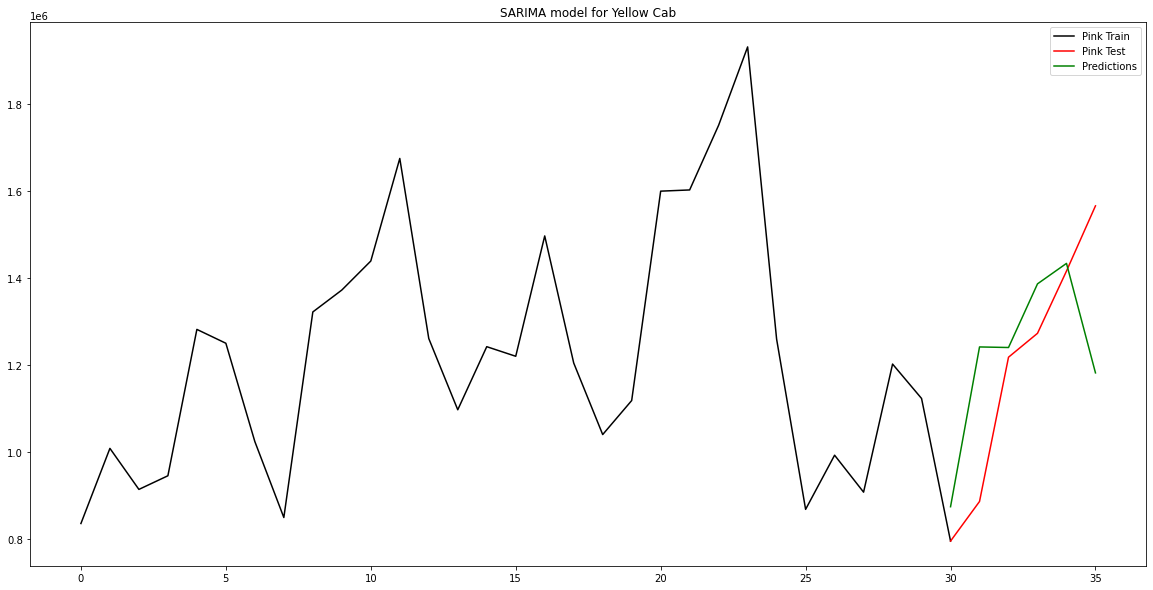

In [49]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX

y1 = c2_train
ARMAmodel = SARIMAX(y1, order = (5, 2, 1), seasonal_order=(1,1,2,12))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(c2_test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = c2_test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot([c for c in range(len(c2_pro)-5)], [c for c in c2_train], color = "black", label = 'Pink Train')
plt.plot([c for c in range(len(c2_pro)-6,len(c2_pro))], [c for c in c2_test], color = "red", label = 'Pink Test')

plt.plot([c for c in range(len(c2_pro)-6,len(c2_pro))], [y for y in y_pred_out], color='green', label = 'Predictions')
plt.legend()
plt.title('SARIMA model for Yellow Cab')
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04142D+00    |proj g|=  2.17126D+00


 This problem is unconstrained.



At iterate    5    f=  7.00916D+00    |proj g|=  1.19491D-01

At iterate   10    f=  7.00096D+00    |proj g|=  2.23894D-02

At iterate   15    f=  6.99905D+00    |proj g|=  7.34964D-03

At iterate   20    f=  6.99852D+00    |proj g|=  9.64122D-03

At iterate   25    f=  6.99674D+00    |proj g|=  7.81045D-03

At iterate   30    f=  6.99663D+00    |proj g|=  6.90252D-03

At iterate   35    f=  6.99662D+00    |proj g|=  3.36487D-04

At iterate   40    f=  6.99661D+00    |proj g|=  3.16683D-03

At iterate   45    f=  6.99660D+00    |proj g|=  1.68630D-03

At iterate   50    f=  6.99660D+00    |proj g|=  4.08521D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

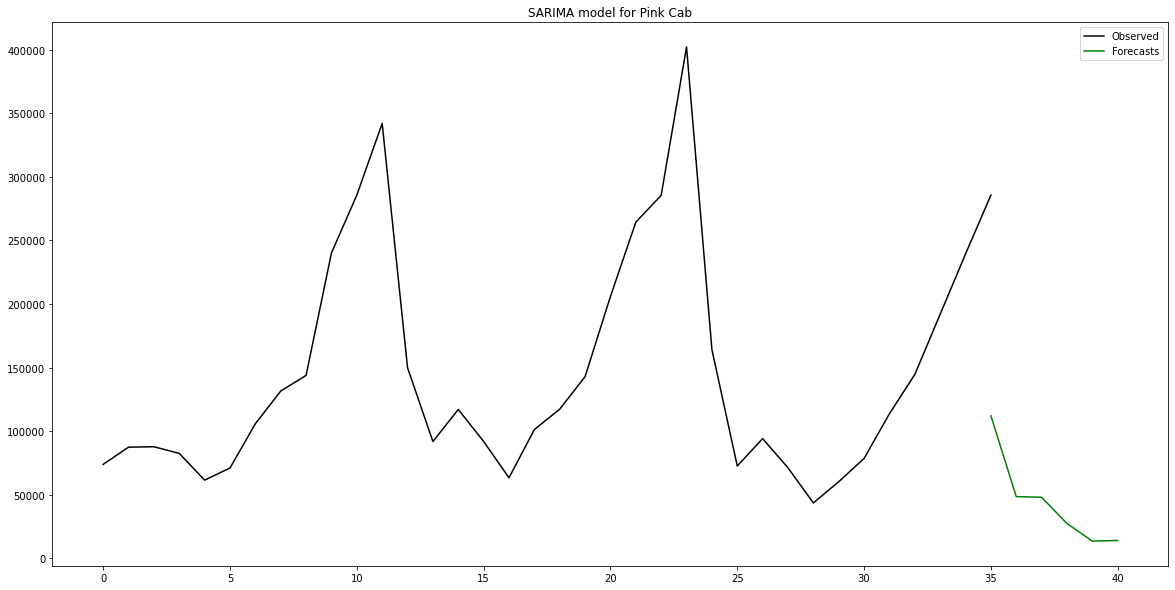

In [79]:
'''plot forecasts for yellow cab'''

c2_fore = pd.date_range(pd.to_datetime('2018-12-01 12:00'), pd.to_datetime('2019-06-01 12:00'), freq='M')

y1 = c1_pro
ARMAmodel = SARIMAX(y1, order = (5, 2, 1), seasonal_order=(3,1,1,12))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(c2_fore))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = c2_fore
y_pred_out = y_pred_df["Predictions"] 

plt.plot([c for c in range(len(c1_pro))], [c for c in c1_pro], color = "black", label = 'Observed')
# plt.plot([c for c in range(len(c2_pro),len(c2_pro)+6)], [c for c in c2_test], color = "red", label = 'Pink Test')

plt.plot([c for c in range(len(c1_pro)-1,len(c1_pro)+5)], [y for y in y_pred_out], color='green', label = 'Forecasts')
plt.legend()
plt.title('SARIMA model for Pink Cab')
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.22771D+00    |proj g|=  6.90145D-01

At iterate    5    f=  8.08591D+00    |proj g|=  2.63892D-02


 This problem is unconstrained.



At iterate   10    f=  8.07616D+00    |proj g|=  2.57679D-01

At iterate   15    f=  8.04922D+00    |proj g|=  3.43141D-02

At iterate   20    f=  8.04608D+00    |proj g|=  3.81690D-02

At iterate   25    f=  8.04511D+00    |proj g|=  7.83771D-03

At iterate   30    f=  8.04476D+00    |proj g|=  7.56130D-04

At iterate   35    f=  8.04476D+00    |proj g|=  4.48171D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     35     40      1     0     0   4.482D-05   8.045D+00
  F =   8.0447562681480527     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


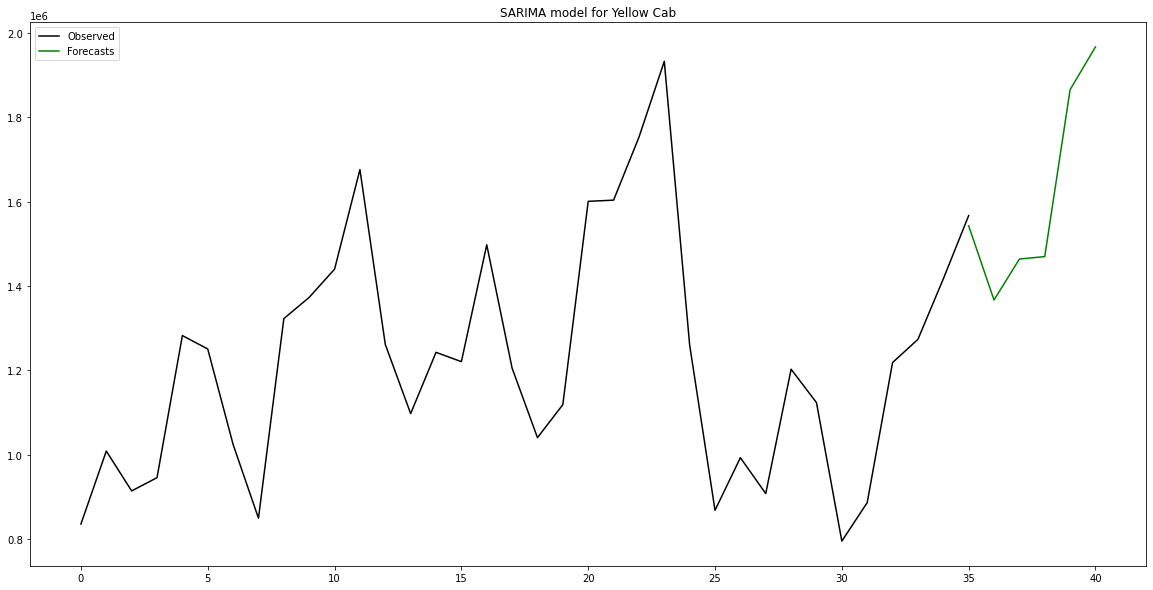

In [60]:
'''plot forecasts for pink cab'''
c2_fore = pd.date_range(pd.to_datetime('2018-12-01 12:00'), pd.to_datetime('2019-06-01 12:00'), freq='M')

y1 = c2_pro
ARMAmodel = SARIMAX(y1, order = (5, 2, 1), seasonal_order=(1,1,2,12))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(c2_fore))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = c2_fore
y_pred_out = y_pred_df["Predictions"] 

plt.plot([c for c in range(len(c2_pro))], [c for c in c2_pro], color = "black", label = 'Observed')
# plt.plot([c for c in range(len(c2_pro),len(c2_pro)+6)], [c for c in c2_test], color = "red", label = 'Pink Test')

plt.plot([c for c in range(len(c2_pro)-1,len(c2_pro)+5)], [y for y in y_pred_out], color='green', label = 'Forecasts')
plt.legend()
plt.title('SARIMA model for Yellow Cab')
plt.show()

In [ ]:
# # grid search sarima hyperparameters
# from math import sqrt
# from multiprocessing import cpu_count
# from joblib import Parallel
# from joblib import delayed
# from warnings import catch_warnings
# from warnings import filterwarnings
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from sklearn.metrics import mean_squared_error
 
# # one-step sarima forecast
# def sarima_forecast(history, config):
#     order, sorder, trend = config
#     # define model
#     model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
#     # fit model
#     model_fit = model.fit(disp=False)
#     # make one step forecast
#     yhat = model_fit.predict(len(history), len(history))
#     return yhat[0]

# # root mean squared error or rmse
# def measure_rmse(actual, predicted):
#     return sqrt(mean_squared_error(actual, predicted))

# # split a univariate dataset into train/test sets
# def train_test_split(data, n_test):
#     return data[:-n_test], data[-n_test:]

# # walk-forward validation for univariate data
# def walk_forward_validation(data, n_test, cfg):
#     predictions = list()
#     # split dataset
#     train, test = train_test_split(data, n_test)
#     # seed history with training dataset
#     history = [x for x in train]
#     # step over each time-step in the test set
#     for i in range(len(test)):
#         # fit model and make forecast for history
#         yhat = sarima_forecast(history, cfg)
#         # store forecast in list of predictions
#         predictions.append(yhat)
#         # add actual observation to history for the next loop
#         history.append(test[i])
#     # estimate prediction error
#     error = measure_rmse(test, predictions)
#     return error

# # score a model, return None on failure
# def score_model(data, n_test, cfg, debug=False):
#     result = None
#     # convert config to a key
#     key = str(cfg)
#     # show all warnings and fail on exception if debugging
#     if debug:
#         result = walk_forward_validation(data, n_test, cfg)
#     else:
#         # one failure during model validation suggests an unstable config
#         try:
#             # never show warnings when grid searching, too noisy
#             with catch_warnings():
#                 filterwarnings("ignore")
#                 result = walk_forward_validation(data, n_test, cfg)
#         except:
#             error = None
#     # check for an interesting result
# #    if result is not None:
# #        print(' > Model[%s] %.3f' % (key, result))
#     return (key, result)

# # grid search configs
# def grid_search(data, cfg_list, n_test, parallel=True):
#     scores = None
#     if parallel:
#         # execute configs in parallel
#         executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
#         tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
#         scores = executor(tasks)
#     else:
#         scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
#     # remove empty results
#     scores = [r for r in scores if r[1] != None]
#     # sort configs by error, asc
#     scores.sort(key=lambda tup: tup[1])
#     return scores

# # create a set of sarima configs to try
# def sarima_configs(seasonal=[12]):
#     models = list()
#     # define config lists
#     p_params = range(3)
#     d_params = [2]
#     q_params = range(3)
#     t_params = ['n','c','t','ct']
#     P_params = range(2)
#     D_params = [2]
#     Q_params = range(2)
#     m_params = [12]
#     # create config instances
#     for p in p_params:
#         for d in d_params:
#             for q in q_params:
#                 for t in t_params:
#                     for P in P_params:
#                         for D in D_params:
#                             for Q in Q_params:
#                                 for m in m_params:
#                                     cfg = [(p, d, q), (P, D, Q, m), t]
#                                     models.append(cfg)
#     return models

In [ ]:
# # define dataset
# data = c1_pro.values
# print(data.shape)
# # data split
# n_test = 10
# # model configs
# cfg_list = sarima_configs()
# print('Configurations: ', len(cfg_list))
# # grid search
# scores = grid_search(data, cfg_list, n_test)
# print('done')
# # list top 3 configs
# for cfg, error in scores[:3]:
#     print(cfg, error)